# Application of BigData Part 1

## Model building For balanced dataset

In [32]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [79]:
df_train_balanced=pd.read_csv('df_balanced.csv')
df_test=pd.read_csv('application_test.csv')

In [80]:
df_train_balanced.drop('Unnamed: 0', axis=1, inplace=True)
df_train_balanced

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1.145218,0,0.728240,1.225943,0.761353,0.221087,0.931971,1.513589,0.157842,0.769479,...,0,0,0,0,0,1,0,0,1,0
1,-2.758668,0,-5.199338,0.190587,0.330873,-0.380326,0.482248,0.496390,-0.905995,-0.239380,...,0,0,0,0,0,1,0,0,1,0
2,-0.268025,0,0.728240,-1.358913,-5.199338,-2.824176,-5.199338,0.667419,1.070541,1.292465,...,0,0,0,0,0,1,0,0,1,0
3,1.435744,0,0.728240,-2.063775,-1.181921,-1.407905,-0.995858,0.074087,-0.069056,-1.781363,...,0,0,0,0,0,1,0,0,1,0
4,-0.274676,0,0.728240,-1.674186,-0.973449,-0.512061,-0.995858,-0.193143,-0.029370,0.205941,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,3.457988,1,0.728240,-0.430727,-0.211361,0.526221,-0.348150,0.171458,0.484649,-0.211277,...,0,0,0,0,0,0,1,0,1,0
7524,3.536867,1,0.728240,0.965420,0.407874,1.304527,0.354822,-0.087933,0.778564,-0.075102,...,0,0,0,0,0,1,0,0,1,0
7525,3.664145,1,-5.199338,0.052716,1.705570,1.031509,1.337127,1.132898,0.817193,-0.693469,...,0,0,0,0,0,0,1,0,1,0
7526,3.713233,1,0.728240,0.523537,-0.280911,0.481561,-0.105580,0.074087,1.376573,-0.677464,...,0,0,0,0,0,0,1,0,1,0


In [81]:
column=df_train_balanced.columns.tolist()


In [82]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df_train_balanced, 'TARGET', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df_train_balanced[df_train_balanced.index.isin(val_idxs)], 'TARGET', val_percent=0.5)

In [83]:
train_df = df_train_balanced[df_train_balanced.index.isin(train_idxs)]

X_train = train_df[column_nan].values
Y_train = train_df[['TARGET']].values
print('Retrieved Training Data')

val_df = df_train_balanced[df_train_balanced.index.isin(val_idxs)]
X_val = val_df[column_nan].values
Y_val = val_df[['TARGET']].values
print('Retrieved Validation Data')

test_df = df_train_balanced[df_train_balanced.index.isin(test_idxs)]
X_test = test_df[column_nan].values
Y_test = test_df[['TARGET']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


In [84]:
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

In [26]:
clf_balanced = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf_balanced.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestClassifier(random_state=27, verbose=1)

In [28]:
predicted_labels = clf_balanced.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
accuracy_score(training_data['Y_test'], predicted_labels)

1.0

In [30]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [34]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [35]:
getTrainScores(gsearch1)

({0: "mean:0.9518187447580676params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}",
  1: "mean:0.9470428055213714params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}",
  2: "mean:0.9624537338234948params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",
  3: "mean:0.9578549425053107params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}",
  4: "mean:0.9564402674463265params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}",
  5: "mean:0.9573269476473033params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}",
  6: "mean:0.9670656936595154params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}",
  7: "mean:0.963348095659876params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}",
  8: "mean:0.9700643532925215params{'crit

In [38]:
clf2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(90,110,10),
    'max_depth'         : [9, 10,11]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = clf2, param_grid = params1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   11.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=27,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': range(90, 110, 10)},
             scoring='f1_micro', verbose=10)

In [39]:
getTrainScores(gsearch2)

({0: "mean:0.9752021132335764params{'max_depth': 9, 'n_estimators': 90}",
  1: "mean:0.9700643532925215params{'max_depth': 9, 'n_estimators': 100}",
  2: "mean:0.9904354233129796params{'max_depth': 10, 'n_estimators': 90}",
  3: "mean:0.9923837368804722params{'max_depth': 10, 'n_estimators': 100}",
  4: "mean:0.9798173651990563params{'max_depth': 11, 'n_estimators': 90}",
  5: "mean:0.9812325105622488params{'max_depth': 11, 'n_estimators': 100}"},
 {'best_mean': 0.9923837368804722,
  'best_param': {'max_depth': 10, 'n_estimators': 100}})

In [88]:
clf2.predict(X_test[4,:].reshape(1,-1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0])

In [40]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import seaborn as sns

In [47]:
#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    
    plot_compare(metrics,store,epochs)
    features = column
    f, ax = plt.subplots(figsize=(10,5))
    plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    ax.set_title('Feature Importance')
    plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

In [48]:
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.76254	val-merror:0.00000	train-mlogloss:1.76253	train-merror:0.00000
[100]	val-mlogloss:0.00055	val-merror:0.00000	train-mlogloss:0.00053	train-merror:0.00000
[200]	val-mlogloss:0.00028	val-merror:0.00000	train-mlogloss:0.00028	train-merror:0.00000
[299]	val-mlogloss:0.00025	val-merror:0.00000	train-mlogloss:0.00024	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 1.0
XGBoost F1-Score (Micro): 1.0


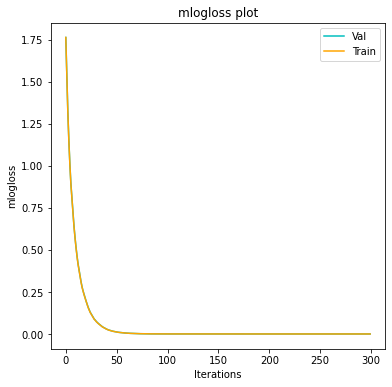

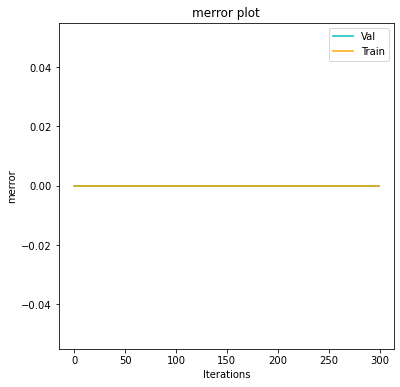

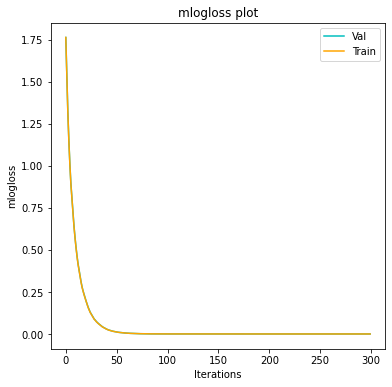

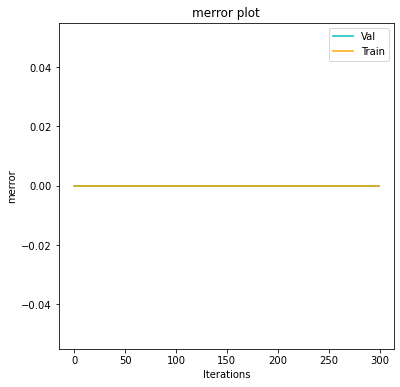

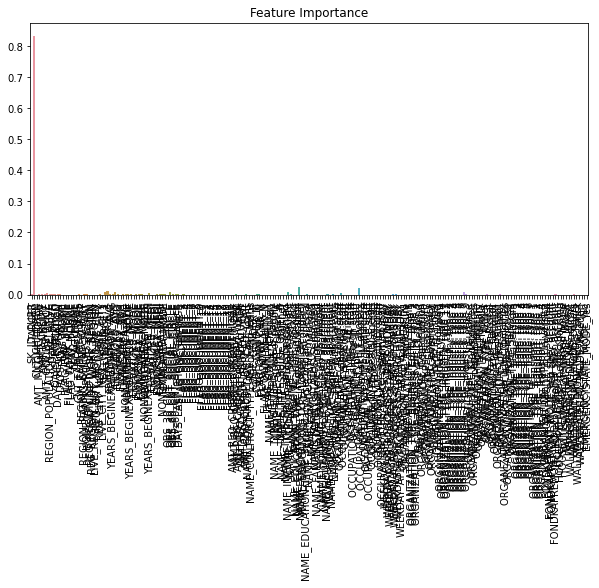

In [49]:
fitXgb(xgb1, training_data)